In [1]:
import numpy as np
import pandas as pd
import os
import time


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [12]:
path = 'Red_Wine_quality/'
SVC_file = 'redwine_forest_data.csv'

col = ['param_criterion','param_max_depth', 'param_max_features','param_n_estimators', 'mean_test_accuracy','mean_test_f1','mean_test_precision', 'mean_test_recall']
col_metric = ['mean_test_accuracy', 'mean_test_f1','mean_test_precision', 'mean_test_recall']

In [21]:
pd_results = pd.read_csv(path + SVC_file)
results = pd_results[col]

In [22]:
results

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
0,gini,5,sqrt,10,0.757214,0.763219,0.785849,0.746903
1,gini,5,sqrt,20,0.757244,0.760797,0.790915,0.734513
2,gini,5,sqrt,30,0.758187,0.763391,0.789563,0.741593
3,gini,5,sqrt,40,0.763790,0.767610,0.796975,0.741593
4,gini,5,sqrt,50,0.764703,0.769890,0.793860,0.748673
...,...,...,...,...,...,...,...,...
595,entropy,25,log2,260,0.801126,0.807373,0.823798,0.794690
596,entropy,25,log2,270,0.797401,0.803836,0.819897,0.791150
597,entropy,25,log2,280,0.798339,0.803750,0.824901,0.785841
598,entropy,25,log2,290,0.797405,0.803542,0.822874,0.787611


In [68]:
def plot_function(results, params, fixed, metrics):
    for id_x,x in enumerate(params):
        len_par = params.copy()
        len_par = np.delete(len_par, id_x)
        sub_res = results.copy()
        
        tit = ''
        for x_par in len_par:
            sub_res = sub_res.loc[(sub_res[x_par] == fixed[x_par])]
            tit += '{} = {}, '.format(x_par[6:],fixed[x_par])
       
        plt.figure()
        x_vals = sub_res[x].to_list()
    
        for single_met in metrics:
            y_vals = sub_res[single_met].to_list()
            plt.plot(x_vals,y_vals, label=single_met)
        plt.ylabel('Metric value')
        plt.xlabel('{}'.format(x[6:]))
        plt.grid()
        plt.legend()
    
            
        plt.title(tit)
        plt.savefig('Red_Wine_quality/plots/SVC/' + tit + x + '.png')

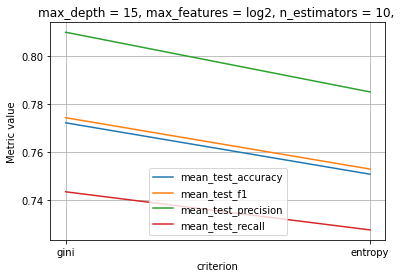

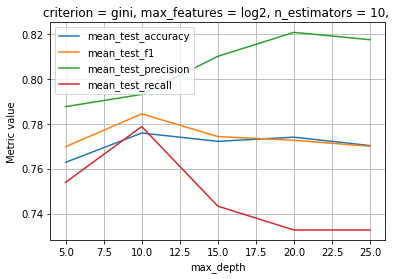

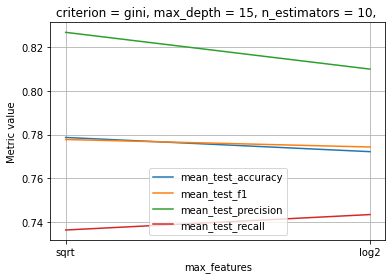

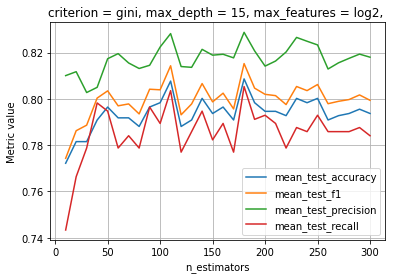

In [32]:
hyperparameters = {'n_estimators': np.linspace(10,300,30).astype(np.int), 
                   'max_depth': np.linspace(5,25,5).astype(np.int),
                  'max_features': ['sqrt','log2'],
                  'criterion': ['gini','entropy']}


fixed = {'param_criterion': 'gini','param_max_depth':15 , 'param_max_features': 'log2','param_n_estimators':10}
plot_function(results, np.array(col[0:4]), fixed, col_metric)

In [84]:
path = 'Red_Wine_quality/'
forest_file_1 = 'redwine_SVC_output-model,_kernel-rbf.csv'
forest_file_2 = 'redwine_SVC_output-model,_kernel-sigmoid.csv'



In [85]:
col = ['param_C','param_gamma','param_kernel', 'mean_test_accuracy','mean_test_f1','mean_test_precision', 'mean_test_recall']
col_metric = ['mean_test_accuracy', 'mean_test_f1','mean_test_precision', 'mean_test_recall']

In [86]:
pd_results = pd.read_csv(path + forest_file_2)
results = pd_results[col]

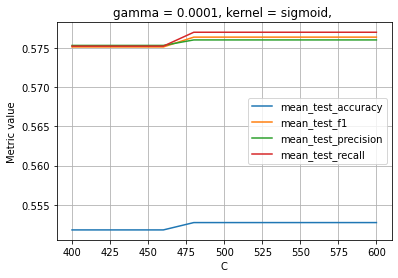

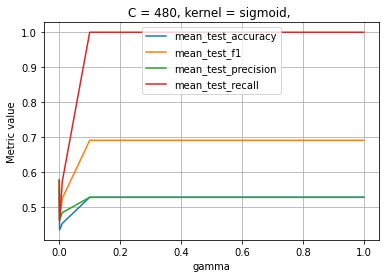

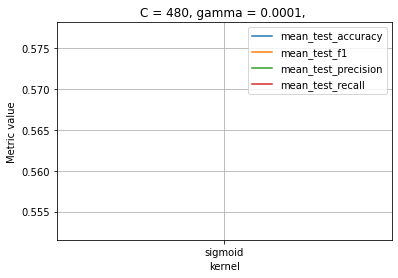

In [87]:
fixed = {'param_C': 480,'param_gamma':0.0001, 'param_kernel':'sigmoid'}
plot_function(results, np.array(col[0:3]), fixed, col_metric)